# Practice 6: K-means Clustering

Use this notebook as the starting point for the Practice activities.

Student Name:    **[  Put your Name Here ]**

**Video Walkthough by Tom -- Coming Soon **

# Section 0

=== *You must run this section to set up things for any of the sections below * ===
### Setting up Python tools



We'll use three libraries for this tutorial: 
- [pandas](http://pandas.pydata.org/) : dataframes for spreadsheet-like data analysis, reading CSV files, time series
- [numpy](http://www.numpy.org/) : for multidimensional data and linear algebra tools
- [matplotlib](http://matplotlib.org/) : Simple plotting and graphing
- [seaborn](http://stanford.edu/~mwaskom/software/seaborn/) : more advanced graphing
-  [scikit-learn](https://scikit-learn.org/stable/) : provides many machine learning algorithms and tools to training and test.




In [0]:
# First, we'll import pandas and numpy, two data processing libraries
import pandas as pd
import numpy as np

# We'll also import seaborn and matplot, twp Python graphing libraries
import seaborn as sns
import matplotlib.pyplot as plt
# Import the needed sklearn libraries
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans


# We will turn off some warns in this notebook to make it easier to read for new students
import warnings
warnings.filterwarnings('ignore')

## The data sets
We will work with the following data sets:
- Section I: Iris flower dataset from Practice 2 & 4
- Section II: Breast cancer data from Project 1 & 2
- Section III: [MNIST](https://en.wikipedia.org/wiki/MNIST_database) handwritten digits. This is our first image data set. Each image is 16x16 grayscale pixels. 



# Section I: Iris Data
=== *You must run Section 0 before this section* ===
### K-means Clustering of Iris data

Remember the iris flower data set has four features for each flower. 

### Load in the Iris data set



In [0]:
# Read in the iris data file from stored in a raw file in GitHub
url_iris = 'https://raw.githubusercontent.com/CIS3115-Machine-Learning-Scholastica/CIS3115ML-Units3and4/master/Iris.csv'
iris = pd.read_csv(url_iris)
# Set the Id column as the index since it is unique for each flower
iris.set_index('Id', inplace=True)

In [3]:
# Display the first 5 flowers to make sure the data was read in
iris.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


### Set up the input and output 
In the past we have called the input **"X"** and the output **"y"** but when working with multiple datasets we will use **"Xiris"** for the input features for the iris flower dataset. Likewise we will use **"yiris"** for the output categories for the iris flowers.


In [0]:
feature_columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm','PetalWidthCm']
Xiris = iris[feature_columns].values
yiris = iris['Species'].values
# We need the species labels converted to number for one of the graphs. Use LabelEncoder for this
lb_make = LabelEncoder()
species_code = lb_make.fit_transform(iris["Species"])

### Scale the data 

In later versions we will also use PCA to reduce the number of featues, but we only have 4 features in the Iris dataset

In [0]:
# Scale the data
mms = MinMaxScaler()
mms.fit(Xiris)
iris_transformed = mms.transform(Xiris)

### Run K-Means Clustering

Here we specify the number of clusters to use with the n_clusters variable

In [0]:
# do the clustering
#from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(iris_transformed)
labels = kmeans.labels_

### Plot the clusters

The left side is the flowers grouped by cluster assigned by K-means
The right side is the flowers grouped by the actual species

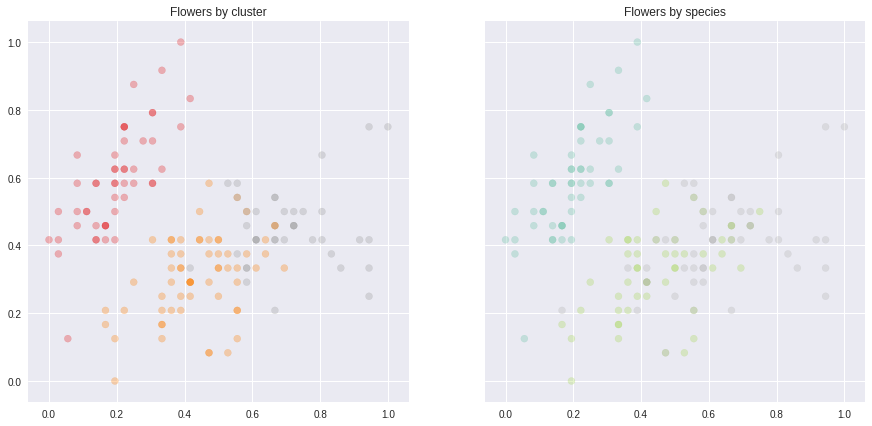

In [14]:
fig, subplots = plt.subplots(nrows=1, ncols=2, figsize=(15,7), sharex=True, sharey=True)

# plot points colored by clusters
subplots[0].scatter(iris_transformed[:, 0], iris_transformed[:, 1], c=labels.astype(np.float), alpha = 0.3, cmap = 'Set1')
subplots[0].set_title('Flowers by cluster')

# plot points by species
subplots[1].scatter(iris_transformed[:, 0], iris_transformed[:, 1], c=species_code, alpha = 0.3, cmap = 'Set2')
subplots[1].set_title('Flowers by species')

plt.show()


## Task 1: Analyze the clustering

- Question 1: Run K-Means above with 3 clusters: Look at the graphs above and describe how well the K-Means clusters match the original species. Assuming the species are very distinct, the K-means clusters should exactly match the species.


- Question 2: Analyze the crosstab below: Each column corresponds to one of the species in Iris. The rows show the number of flowers of that species that was placed in each cluster. Which species was most confusing to K-means, that is which was was not placed all in one cluster?


- Question 3: Replicate your results: Run K-means again with 3 clusters. K-means uses random starting clusters, so it will not generate the same clusters each time. Compare your results to the first time you ran it using either the graph above or the crosstab below.


- Question 4: A different number of clusters: Run K-means with a different number of clusters, 2 or 4 or more. Using either the graph above or the crosstab below, describe how K-means cluster the species. Does each cluster contain only one species?

In [8]:
pd.crosstab(labels, yiris, rownames=['Cluster'], colnames=['Species'] )



Species,Iris-setosa,Iris-versicolor,Iris-virginica
Cluster,,,
0,50,0,0
1,0,47,14
2,0,3,36


## Task 2: Finding the Elbow

The code below runs K-means with clusters ranging from 1 to 15 and measures how closely each point to the other points in its cluster. This is graphed for each run. With only 1 clusters, the points are on in the same cluster and far away from each other. With 15 clusters, the points are generally very close to the other points in that cluster.

As described in [Unsupervised learning with K-means](https://medium.com/infosimples/unsupervised-learning-with-k-means-3eaa0666eebf) by Gisely Alves, the Elbow is the point where adding more clusters does not make the points much closer to each other.

- Question 1: Where would you say the elbow is for the Iris data? Does this match your expectation since the data is of 3 iris species?


- Question 2: Most flower species were assigned before the discovery of DNA and modern genetics. Based on your choice of the elbow, do you think these flowers should be broken up into 3 species? Would it fit the data better if there were only 2 species? Is it possible that one, or more, of the species should be broken up into sub-species?


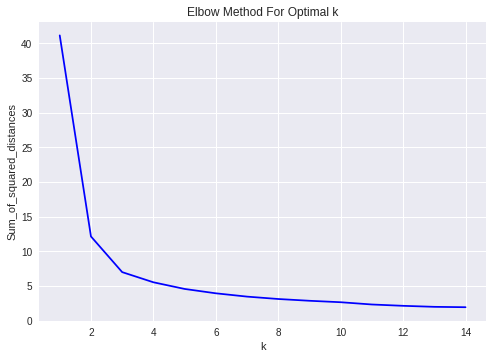

In [16]:
# Calculate and plot the elbow 
data_transformed = iris_transformed
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(iris_transformed)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

### Silhouette Analysis
The code below performs [Silhouette Analysis](https://kapilddatascience.wordpress.com/2015/11/10/using-silhouette-analysis-for-selecting-the-number-of-cluster-for-k-means-clustering/) on the clusters.


For n_clusters = 2 The average silhouette score : 0.6294675561906644
For n_clusters = 3 The average silhouette score : 0.5043188549150884
For n_clusters = 4 The average silhouette score : 0.4446273300650682
For n_clusters = 5 The average silhouette score : 0.35538315267369
For n_clusters = 6 The average silhouette score : 0.3552714312369295


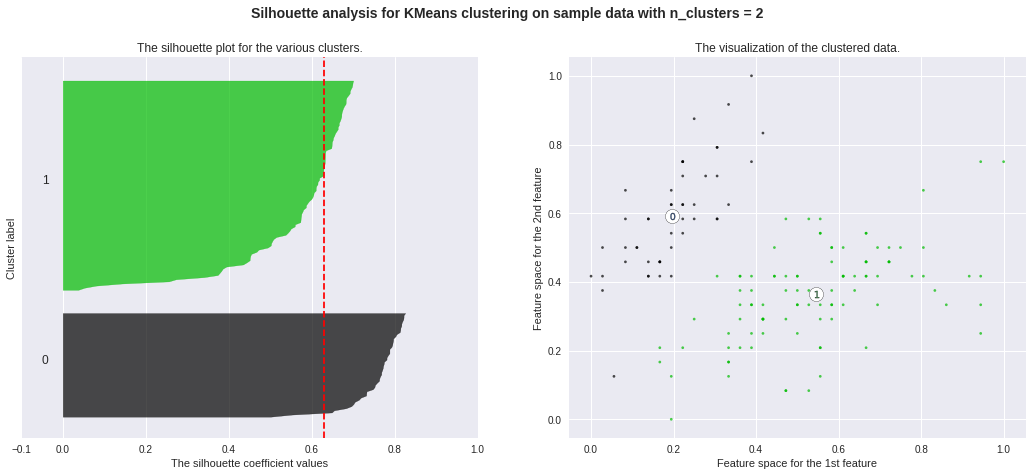

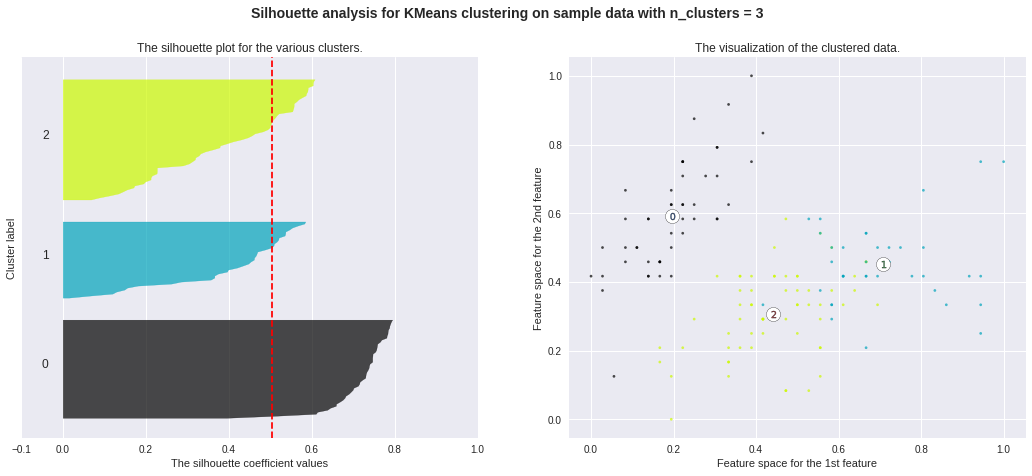

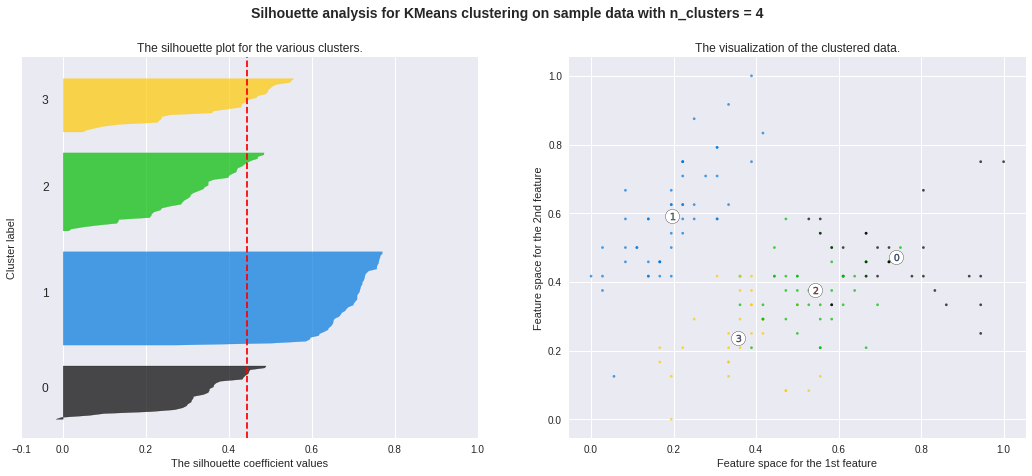

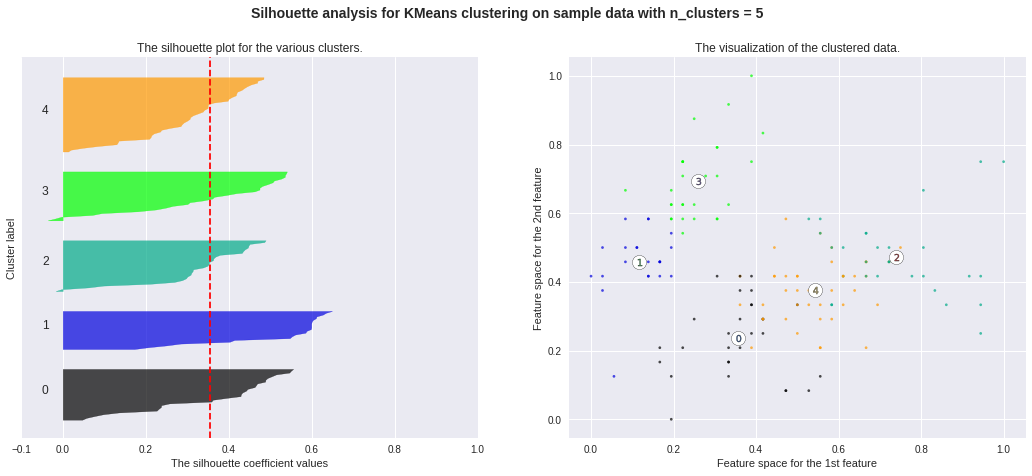

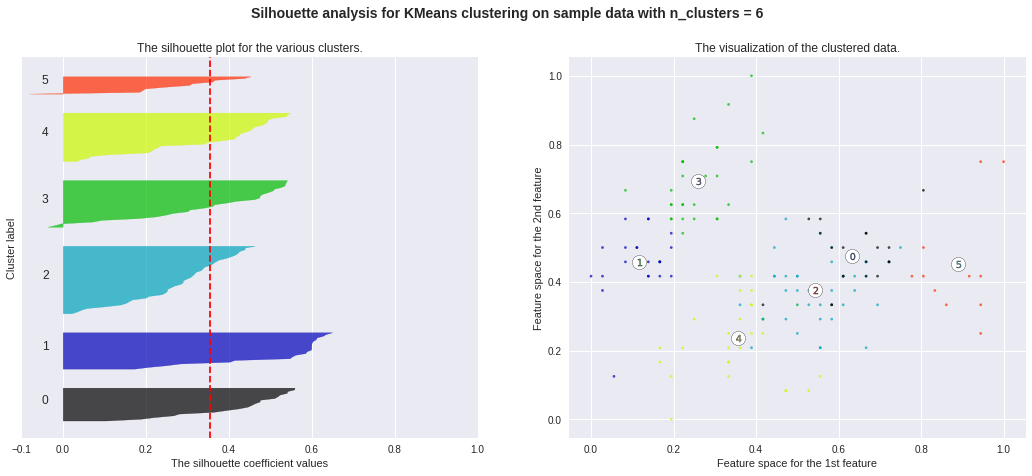

In [18]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
data_transformed = iris_transformed

range_n_clusters = [2, 3, 4, 5, 6]
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(data_transformed) + (n_clusters + 1) * 10])
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(data_transformed)
# The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(data_transformed, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette score :", silhouette_avg)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(data_transformed, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color,       alpha=0.7)
        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(data_transformed[:, 0], data_transformed[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')
    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
plt.show()

## Task 3: Silhouette Analysis
The code below performs [Silhouette Analysis](https://kapilddatascience.wordpress.com/2015/11/10/using-silhouette-analysis-for-selecting-the-number-of-cluster-for-k-means-clustering/) on the clusters for 2, 3, 4, 5 and 6 clusters. 

The left graphs show the silhouette values for each flower. Good clusters these values are close to +1 meaning the flowers are very close to other flowers in the cluster and far away from flowers in other clusters. A value of -1 is bad since it means the flower is closer to flowers in other clusters than flowers in its own cluster.

So, we want the flowers in the left graph to have values as large as possible. The red dotted line shows the average value for the graph, so we also want this as large as possible. 

The graphs on the right show how the flowers map onto the first two principle components (remember Principle Component Analysis from the last unit). The center of each cluster is also marked with the cluster number.

- Question 1: Looking at these graphs, what number of clusters do you think provides the "best" clustering. This can be your opinion, since we don't have a clear definition of what makes a cluster the "best".

- Question 2: Provide some justification for why you selected the number of clusters above using the Silhouette Analysis. Why did you select the number of clusters you selected?

# Section II: Microorganisms
=== *You must run Section 0 before this section* ===
### Mirco organism dataset
Read in data
101 rows, one row for each loctation. Each location is given a name such as AK001 or AK026. <br>
- dataframe contains all the collums in a panda datafram<br>
- names is just the location names in 101 rows<br>
- attributes is the attributes of each location such as the altitude and gps location.<br>
- data has a column for each organism, such as OTU_12 or OTU_135, with a measure of the population of this organism at each location. <br>

dataframe = pd.read_csv("locations_logvals_top1000.csv")
names = dataframe.iloc[:,0:1]
attributes = dataframe.iloc[:,1:11]
data = dataframe.iloc[:,11:1011]

In [0]:
dataframe = pd.read_csv("locations_logvals_top1000.csv")
names = dataframe.iloc[:,0:1]
attributes = dataframe.iloc[:,1:11]
data = dataframe.iloc[:,11:1011]


In [0]:
# Scale the data
#scaler = StandardScaler()
#Xcancer = scaler.fit_transform(Xcancer)
mms = MinMaxScaler()
mms.fit(data)
data_transformed = mms.transform(data)

In [0]:
# Use Pincipal Component Analysis (PCA) to reduce the data to two dimensions using n_components=2
from sklearn.decomposition import PCA

pca2 = PCA(n_components=10)
data_transformed = pca2.fit_transform(data_transformed)


In [0]:
# do the clustering
#from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(data_transformed)
labels = kmeans.labels_

In [0]:
def plot_clustering(data, labels, title=None):
    x_min, x_max = np.min(data, axis=0), np.max(data, axis=0)
    data = (data - x_min) / (x_max - x_min)
    fig = plt.figure(1, figsize=(4, 3))
    plt.figure(figsize=(6, 4))
    plt.scatter(data[:, 0], data[:, 1], c=labels.astype(np.float), alpha = 0.3)
    plt.xticks([])
    plt.yticks([])
    if title is not None:
        plt.title(title, size=17)
    plt.axis('off')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])


<Figure size 288x216 with 0 Axes>

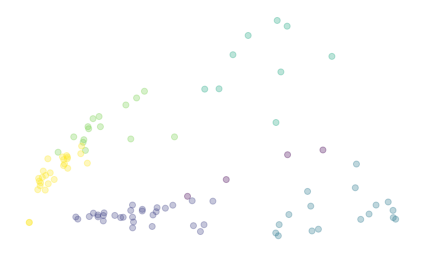

In [0]:
# do the clustering
#k_means = sklearn.cluster.KMeans(n_clusters=3)

kmeans = KMeans(n_clusters=6)
kmeans.fit(data_transformed)
labels = kmeans.labels_
plot_clustering(data_transformed, labels)
plt.show()

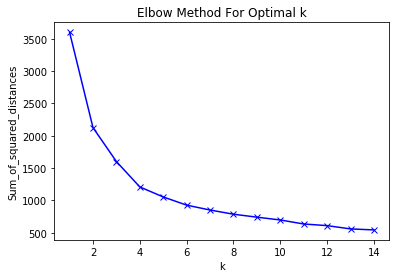

In [0]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Para n_clusters = 2 O score_silhouette médio é : 0.4277579630252757
Para n_clusters = 3 O score_silhouette médio é : 0.4147750430125998
Para n_clusters = 4 O score_silhouette médio é : 0.34451347950849537
Para n_clusters = 5 O score_silhouette médio é : 0.3150450738967675
Para n_clusters = 6 O score_silhouette médio é : 0.2846627347911804


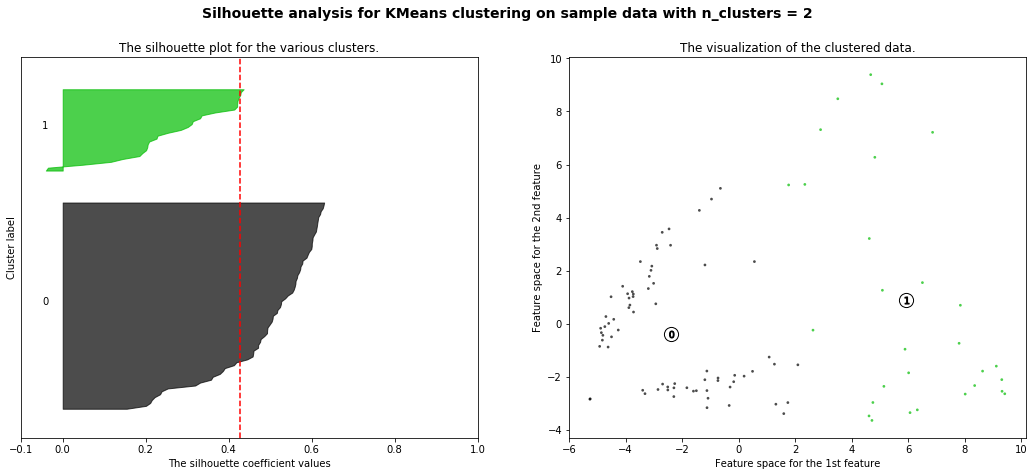

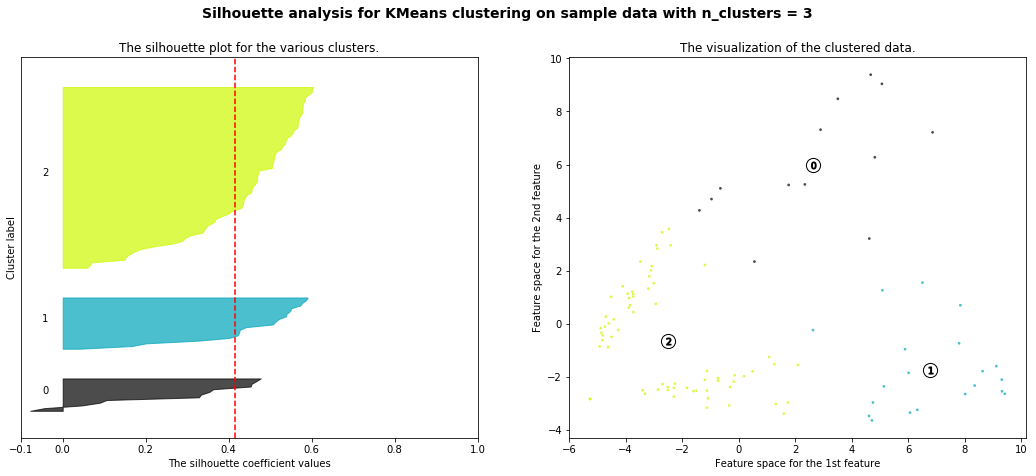

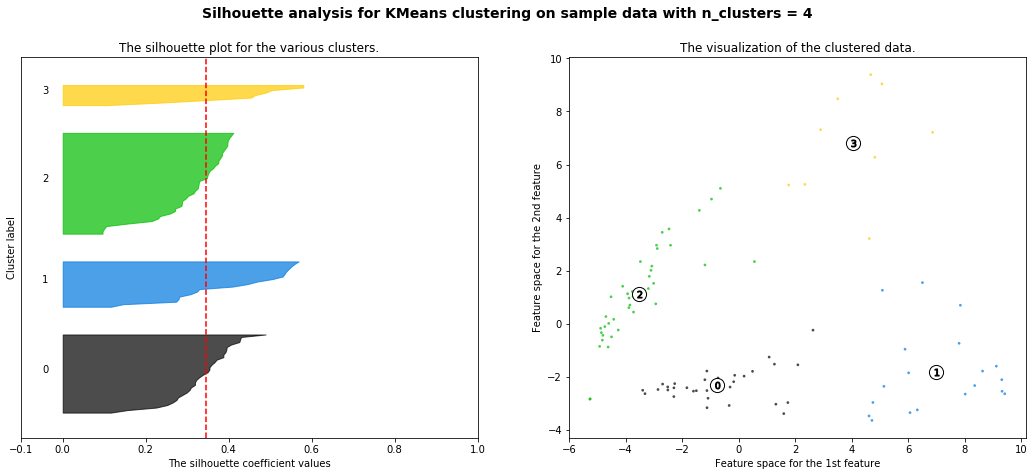

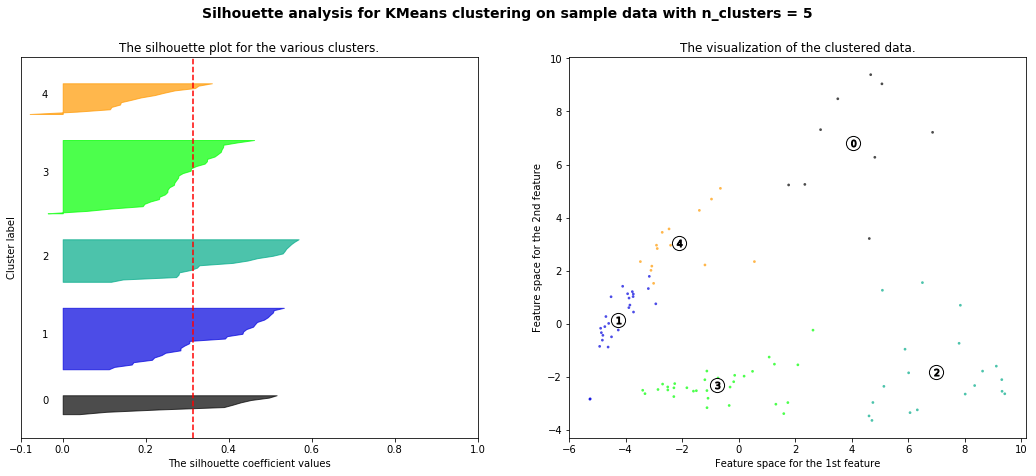

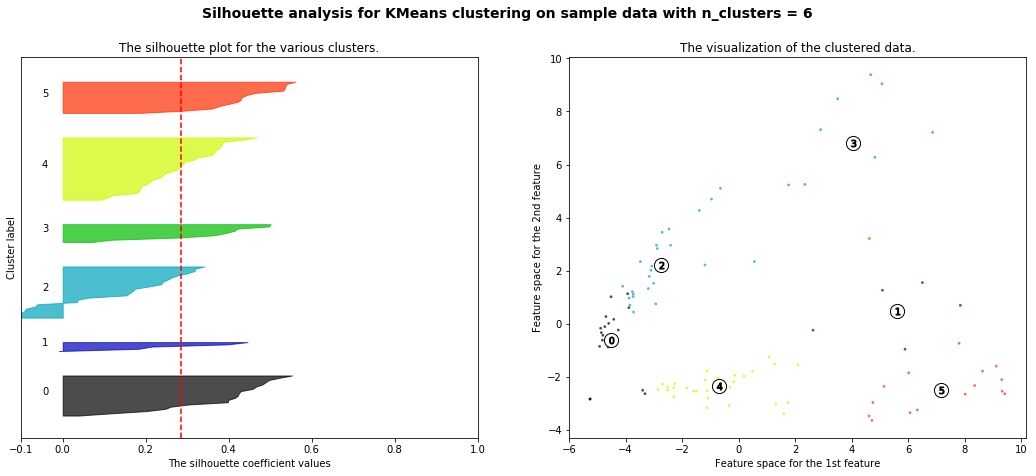

In [0]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

range_n_clusters = [2, 3, 4, 5, 6]
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(data_transformed) + (n_clusters + 1) * 10])
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(data_transformed)
# The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(data_transformed, cluster_labels)
    print("Para n_clusters =", n_clusters,
          "O score_silhouette médio é :", silhouette_avg)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(data_transformed, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color,       alpha=0.7)
        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(data_transformed[:, 0], data_transformed[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')
    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
plt.show()

# Wrapping Up

Remember to **share this sheet with your instructo**r and submit a link to it in Blackboard.